# Capstone Project 1: Supervised Regression Models

In [1]:
# Import libraries:
import pandas as pd #for building pandas dataframes for analysis
import numpy as np #fundamental package for scientific computing with Python

# Plotting/Visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as P

# Classical Stats Modeling:
import statsmodels.api as sm #provides estimation of many different statistical models, tests and data exploration 
import scipy.stats as stats #large number of probability distributions and statistical functions

# Supervised Learning:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neural_network
from sklearn.neural_network import MLPRegressor




/Users/carolinerosefrensko/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Cleaned Data w/o Accommodates
filtered_result4 = pd.read_csv('/Users/carolinerosefrensko/Downloads/data_wrangling_json/AirBNB_cleaned_dataChicagoprice2018-07-11.csv')
filtered_result4.head()

,bedrooms,minstay,overall_satisfaction,price,reviews,City_Chicago,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
0,3.0,2.0,5.0,98.0,186,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,4.0,4.5,296.0,46,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,3.0,5.0,108.0,50,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,4.0,4.5,217.0,9,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1.0,4.5,433.0,34,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
filtered_result4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90223 entries, 0 to 90222
Columns: 198 entries, bedrooms to neighborhood_Wrigleyville
dtypes: float64(4), int64(194)
memory usage: 136.3 MB


#### Prepare Features

In [4]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)

#Overall_Satisfaction Column
Y = filtered_result4.price

# Standardize the data
#Xscaled = scale(X)
models = []


#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 42)

#### Fit & Predict

In [5]:
def root_mean_squared_error(mean_squared_error, y_test, y_pred_test):
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
    return RMSE

In [6]:
def forcast_bias(y_test, y_pred_test):
    bias = np.mean(y_test - y_pred_test)
    return bias

In [7]:
def get_performance_metrics(model_name, y_test, y_pred_test):
    '''Build a dictionary of regression model performance metrics: R2, MSE, and MAE'''
    metrics = {}
    metrics = {'Model': model_name, 'R2': r2_score(y_test, y_pred_test), 
               'RMSE': root_mean_squared_error(mean_squared_error, y_test, y_pred_test),
               'Bias': forcast_bias(y_pred_test, y_test)}
    return (metrics)

In [8]:
linreg = get_performance_metrics('Linear Regression', y_test, LinearRegression(fit_intercept=True, copy_X=True)
                                        .fit(X_train, y_train)
                                        .predict(X_test))
models.append(linreg)

In [9]:
knn = linreg = get_performance_metrics('KNN Regression', y_test, KNeighborsRegressor()
                                        .fit(X_train, y_train)
                                        .predict(X_test))
models.append(knn)

In [10]:
dtr = get_performance_metrics('Decision Tree', y_test, DecisionTreeRegressor()
                                        .fit(X_train, y_train)
                                        .predict(X_test))
models.append(dtr)

In [11]:
rfr = get_performance_metrics('Random Forest', y_test, RandomForestRegressor(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_test))
models.append(rfr)

In [12]:
mlp = get_performance_metrics('Multi-Layer Perceptron', y_test, MLPRegressor(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_test))
models.append(mlp)

In [13]:
lasso = get_performance_metrics('Lasso', y_test, Lasso(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_test))
models.append(lasso)

In [14]:
gbr = get_performance_metrics('Gradient Boosting', y_test, GradientBoostingRegressor(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_test))
models.append(gbr)

In [15]:
eln = get_performance_metrics('Elastic Net', y_test, ElasticNet(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_test))
models.append(eln)

In [16]:
ridge = get_performance_metrics('Ridge Regression', y_test, linear_model.Ridge(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_test))
models.append(ridge)

In [17]:
#Test Set Values
df_models = pd.DataFrame(models).set_index('Model')
df_models = df_models[['R2', 'RMSE', 'Bias']]
df_models.sort_values('R2', ascending=False)

# R$^2$ Score (coefficient of determination):  best possible score is 1.0, highest value is best.
# MSE & RMSE:  lowest value is best.

,R2,RMSE,Bias
Model,,,
Random Forest,0.684434,42.049271,0.036840
Decision Tree,0.638756,44.989753,0.045266
KNN Regression,0.579455,48.542230,1.380083
Multi-Layer Perceptron,0.575138,48.790718,-2.931639
Linear Regression,0.528445,51.401924,-0.273309
Ridge Regression,0.528415,51.403553,-0.269730
Gradient Boosting,0.524181,51.633810,-0.201450
Lasso,0.417803,57.114744,-0.233618
Elastic Net,0.326028,61.451768,-0.423048


/Users/carolinerosefrensko/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


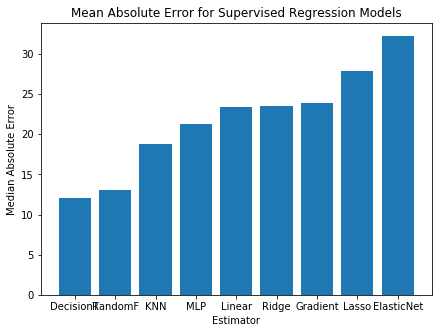

In [19]:
rs = 1
ests = [ensemble.RandomForestRegressor(), tree.DecisionTreeRegressor(), neighbors.KNeighborsRegressor(),
        neural_network.MLPRegressor(),
        linear_model.LinearRegression(), ensemble.GradientBoostingRegressor(),
        linear_model.Lasso(), linear_model.ElasticNet(), linear_model.Ridge()]
ests_labels = np.array(['RandomF','DecisionT','KNN','MLP','Linear','Gradient','Lasso','ElasticNet','Ridge'])
errvals = np.array([])

X = filtered_result4.drop('price', axis = 1)
Y = filtered_result4.price

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.title('Mean Absolute Error for Supervised Regression Models')
plt.xlabel('Estimator')
plt.ylabel('Median Absolute Error')
plt.show()

Looking at the mean absolute error for these eight estimators, the majority predict the price with an error of around 20-30 dollars. Decision Tree and Random Forest methods work the best with a predicted price error of only 10-15 dollars with the Decision Tree model performing marginally better.